# Unveiling Natures Symphony An Animal Sounds Dataset for Audio Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import librosa 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import IPython
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from imblearn.over_sampling import SMOTE

In [2]:
path = r"Animal-SDataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories

['Bird',
 'Cat',
 'Chicken',
 'Cow',
 'Dog',
 'Donkey',
 'Frog',
 'Lion',
 'Monkey',
 'Sheep']

In [3]:
def remove_noise(audio, sr):
    noise_profile = audio[:int(0.5 * sr)]
    noise_reduced_audio = librosa.effects.remix(audio, intervals=librosa.effects.split(audio, top_db=20))
    return noise_reduced_audio

In [4]:
def load_audio_from_directory_or_cache(path, categories, sr, n_mfcc, model_folder):
    X_file = os.path.join(model_folder, "X.npy")
    Y_file = os.path.join(model_folder, "Y.npy")

    if os.path.exists(X_file) and os.path.exists(Y_file):
        print(f"Loading cached data from {model_folder}")
        X = np.load(X_file)
        Y = np.load(Y_file)
    else:
        print(f"Path does not exist: {path}" if not os.path.exists(path) else "Processing directory")
        X = []
        Y = []

        if not os.path.exists(path):
            print(f"Path does not exist: {path}")
            return np.array(X), np.array(Y)

        for root, dirs, files in os.walk(path):
            print(f"Processing root: {root}")
            for file in files:
                name = os.path.basename(root)
                if file.endswith('.wav'):
                    file_path = os.path.join(root, file)
                    try:
                        y, sr = librosa.load(file_path, sr=sr) 
                        y = remove_noise(y, sr)
                        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
                        mfccs_mean = np.mean(mfccs.T, axis=0)  # Taking the mean of the MFCCs
                        X.append(mfccs_mean)
                        if name in categories:
                            Y.append(categories.index(name))
                        else:
                            print(f"Category {name} not in categories list.")
                    except Exception as e:
                        print(f"Skipping {file_path}, error reading file: {e}")

        X = np.array(X)
        Y = np.array(Y)
        os.makedirs(model_folder, exist_ok=True)  # Create the directory if it doesn't exist
        np.save(X_file, X)
        np.save(Y_file, Y)
    
    return X, Y

In [5]:
# Load audio
X, Y = load_audio_from_directory_or_cache(path, categories, 22050, 13, 'model')

# Debug print statements to check the shape of X and Y
print(f"Shape of X before any reshaping: {X.shape}")
print(f"Shape of Y: {Y.shape}")

# Check the shape of X and ensure it is 2D
if len(X.shape) != 2:
    raise ValueError(f"X should be a 2D array but got shape {X.shape}")

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save arrays
print(f"Processed and saved {len(X)} audio files.")


Loading cached data from model
Shape of X before any reshaping: (865, 13)
Shape of Y: (865,)
Processed and saved 865 audio files.


In [6]:
X_list = X.tolist()
Y_list = Y.tolist()

# Create DataFrame
df = pd.DataFrame({'X': X_list, 'Y': Y_list})

In [7]:
# Resample the data
df_sampled = resample(df, replace=True, n_samples=15000, random_state=42)

In [8]:
df_sampled

,X,Y
102,"[-1.1127467155456543, -1.660539984703064, -0.8...",0
435,"[1.433356761932373, 0.6487839221954346, 1.2793...",3
860,"[-1.4893075227737427, 0.4118630886077881, -0.5...",9
270,"[-0.7033706903457642, -0.18084266781806946, 1....",1
106,"[-1.8987733125686646, -2.1955068111419678, -0....",0
...,...,...
230,"[0.4800233840942383, -0.8271535038948059, -0.7...",1
520,"[-0.5703498125076294, 0.7127469182014465, 0.60...",4
702,"[1.0928049087524414, 0.3873538374900818, -1.28...",5
199,"[-1.4677433967590332, -0.7260937690734863, 1.2...",0


In [9]:
X_new = df_sampled['X'].tolist()
Y_new = df_sampled['Y'].tolist()

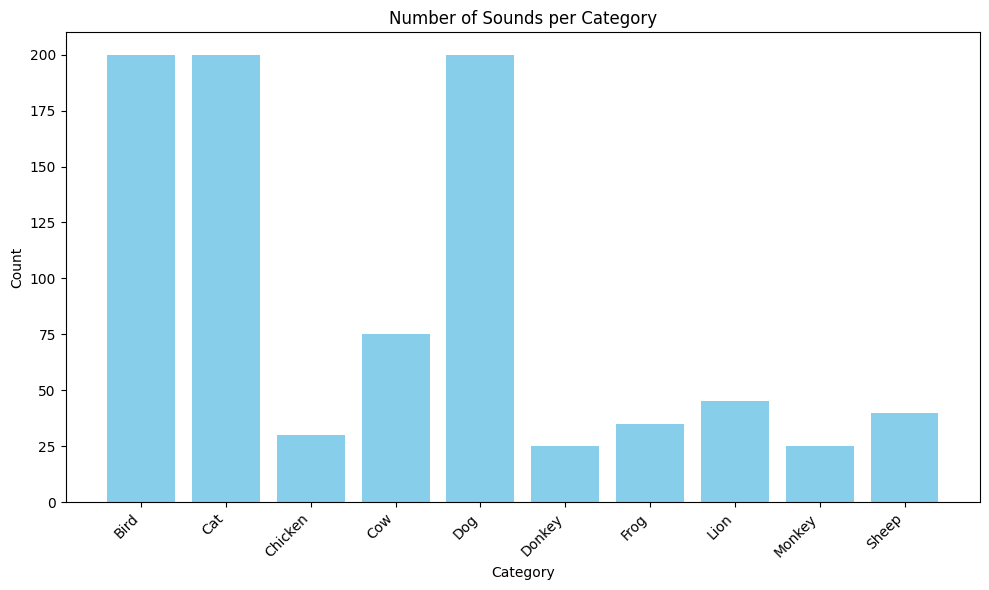

In [10]:
# Plot the counts of each category
category_counts = {category: len(os.listdir(os.path.join(path, category))) for category in categories}
df_counts = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(10, 6))
plt.bar(df_counts['Category'], df_counts['Count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Sounds per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
Y_new

[0,
 3,
 9,
 1,
 0,
 0,
 5,
 0,
 4,
 0,
 3,
 1,
 1,
 3,
 0,
 1,
 0,
 4,
 0,
 4,
 1,
 7,
 1,
 3,
 2,
 8,
 1,
 0,
 1,
 0,
 3,
 1,
 0,
 1,
 6,
 9,
 4,
 3,
 0,
 4,
 4,
 3,
 5,
 7,
 0,
 4,
 4,
 4,
 1,
 9,
 4,
 0,
 3,
 8,
 4,
 0,
 9,
 0,
 1,
 1,
 4,
 1,
 0,
 1,
 7,
 1,
 4,
 1,
 0,
 1,
 3,
 2,
 4,
 7,
 0,
 1,
 0,
 4,
 1,
 0,
 1,
 4,
 0,
 7,
 8,
 3,
 5,
 2,
 6,
 4,
 0,
 1,
 1,
 9,
 8,
 1,
 3,
 3,
 6,
 1,
 5,
 1,
 6,
 5,
 6,
 1,
 0,
 7,
 1,
 7,
 0,
 1,
 3,
 0,
 0,
 0,
 8,
 0,
 9,
 9,
 4,
 1,
 0,
 4,
 3,
 0,
 0,
 3,
 4,
 1,
 4,
 2,
 1,
 1,
 7,
 3,
 1,
 0,
 0,
 0,
 1,
 9,
 7,
 0,
 0,
 3,
 2,
 4,
 6,
 8,
 0,
 4,
 6,
 4,
 6,
 4,
 3,
 4,
 7,
 0,
 1,
 3,
 7,
 1,
 7,
 1,
 1,
 0,
 9,
 4,
 3,
 4,
 4,
 9,
 6,
 1,
 4,
 0,
 6,
 3,
 2,
 1,
 6,
 4,
 0,
 4,
 0,
 4,
 0,
 9,
 5,
 1,
 0,
 7,
 4,
 4,
 4,
 4,
 4,
 7,
 0,
 4,
 4,
 1,
 7,
 1,
 4,
 4,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 4,
 4,
 6,
 1,
 1,
 5,
 3,
 2,
 4,
 1,
 4,
 1,
 8,
 1,
 4,
 4,
 9,
 1,
 4,
 4,
 3,
 1,
 4,
 0,
 9,
 3,
 3,
 4,
 1,
 4,
 8,
 1,
 1,
 0,


In [12]:
X_new

[[-1.1127467155456543,
  -1.660539984703064,
  -0.8281524777412415,
  -0.5147726535797119,
  -0.5001383423805237,
  0.9583123326301575,
  1.6394140720367432,
  0.04233764111995697,
  -0.8847426176071167,
  1.9065014123916626,
  1.8365763425827026,
  -1.8117858171463013,
  -0.7821580171585083],
 [1.433356761932373,
  0.6487839221954346,
  1.2793525457382202,
  -0.2677974998950958,
  0.5964360237121582,
  0.12265495955944061,
  -0.38936614990234375,
  -0.3314560353755951,
  -0.34786683320999146,
  -0.47940558195114136,
  0.6161885261535645,
  -0.10129434615373611,
  -0.3614746034145355],
 [-1.4893075227737427,
  0.4118630886077881,
  -0.526282787322998,
  0.09993484616279602,
  0.8331741690635681,
  -0.4205766022205353,
  0.43837228417396545,
  -0.8069697618484497,
  1.0186539888381958,
  0.005187864415347576,
  -0.11364179849624634,
  1.8594838380813599,
  1.282639503479004],
 [-0.7033706903457642,
  -0.18084266781806946,
  1.8278319835662842,
  0.6673687100410461,
  1.0327720642089844,

In [13]:
# Create SMOTE object and fit-transform the data
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_new, Y_new)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.35, random_state = 44)

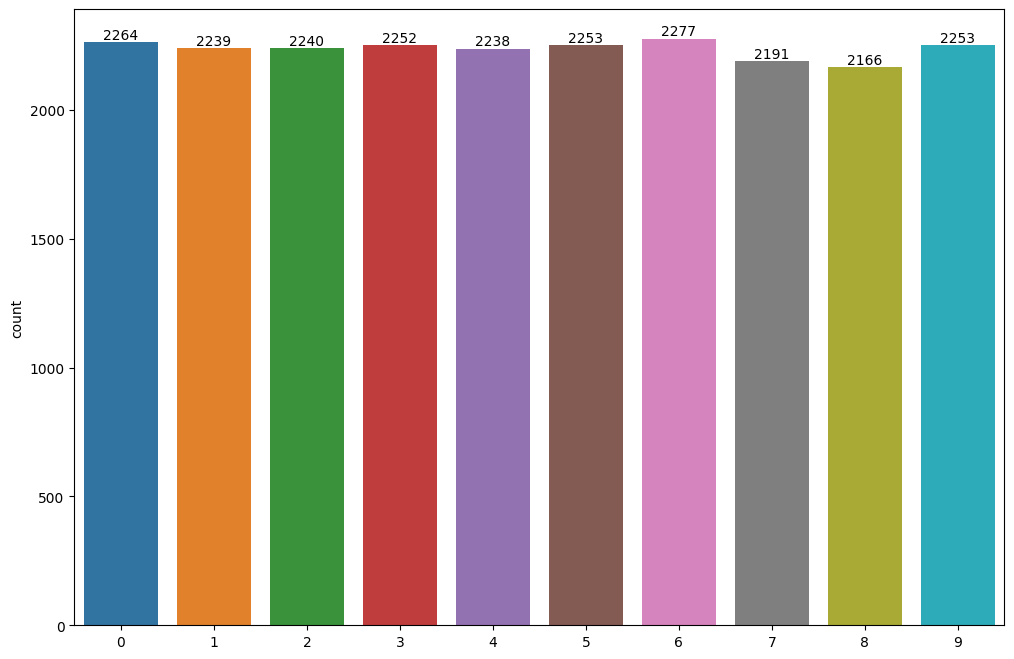

In [15]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [16]:
precision = []
recall = []
fscore = []
accuracy = []

labels = categories
      
def performance_metrics(algorithm, predict, testY):
    #estY = testY.astype('int')
    #redict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# GaussianNB

GaussianNB Accuracy    : 62.54669212252013
GaussianNB Precision   : 63.79426631825334
GaussianNB Recall      : 62.65504339332924
GaussianNB FSCORE      : 62.771605846261316

 GaussianNB classification report
               precision    recall  f1-score   support

        Bird       0.85      0.89      0.87      1126
         Cat       0.69      0.63      0.66      1337
     Chicken       0.62      0.69      0.65      1078
         Cow       0.40      0.45      0.42      1062
         Dog       0.68      0.52      0.59      1580
      Donkey       0.56      0.44      0.49      1511
        Frog       0.71      0.81      0.76      1021
        Lion       0.72      0.65      0.68      1392
      Monkey       0.45      0.57      0.50       999
       Sheep       0.58      0.74      0.65       941

    accuracy                           0.63     12047
   macro avg       0.63      0.64      0.63     12047
weighted avg       0.63      0.63      0.62     12047



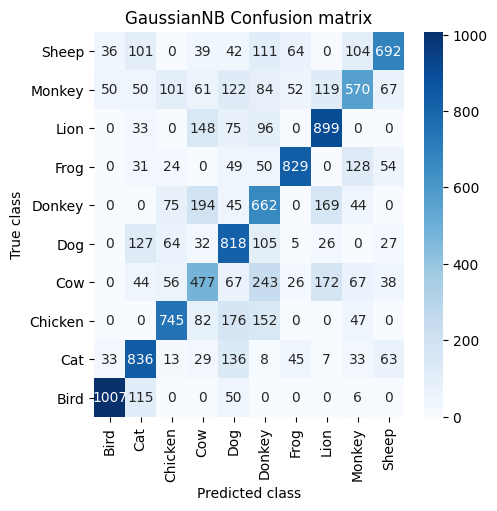

In [17]:
path = 'model/GaussianNB'
if(os.path.exists(path)):
    gnb = joblib.load(path) 

else:
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    joblib.dump(gnb,path)

y_pred = gnb.predict(X_test)
performance_metrics('GaussianNB', y_pred, y_test)

# GradientBoostingClassifier

GradientBoostingClassifier Accuracy    : 97.76707894081514
GradientBoostingClassifier Precision   : 97.86961176462266
GradientBoostingClassifier Recall      : 97.75606159422821
GradientBoostingClassifier FSCORE      : 97.76511851718179

 GradientBoostingClassifier classification report
               precision    recall  f1-score   support

        Bird       0.99      0.97      0.98      1209
         Cat       0.99      0.98      0.98      1214
     Chicken       0.90      1.00      0.95      1083
         Cow       0.98      0.98      0.98      1194
         Dog       0.97      0.89      0.93      1316
      Donkey       1.00      1.00      1.00      1189
        Frog       0.98      1.00      0.99      1147
        Lion       0.99      0.99      0.99      1254
      Monkey       1.00      1.00      1.00      1276
       Sheep       0.96      0.98      0.97      1165

    accuracy                           0.98     12047
   macro avg       0.98      0.98      0.98     12047
weighted

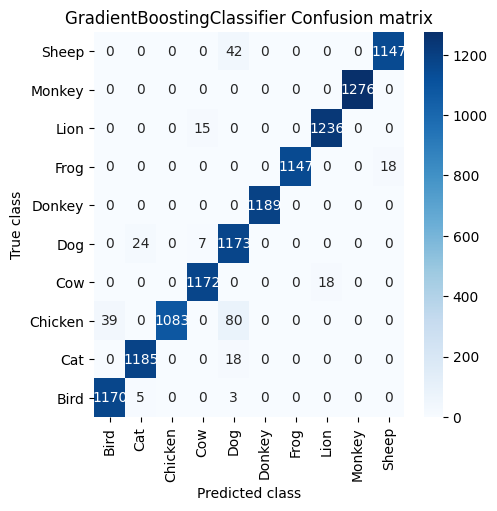

In [18]:
path = 'model/GradientBoostingClassifier'
if(os.path.exists(path)):
    gbc = joblib.load(path) 

else:
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    joblib.dump(etc,path)

y_pred = gbc.predict(X_test)
performance_metrics('GradientBoostingClassifier', y_pred, y_test)

In [19]:
# prediction on new test data

In [22]:
# Prediction on new test data
def preprocess_audio(audio_path, scaler):
    audio, sr = librosa.load(audio_path, sr=None)
    audio = remove_noise(audio, sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    features = np.mean(mfccs, axis=1)
    features = scaler.transform([features])  # Normalize features
    return features

In [26]:
audio_path = r"C:\Users\saitejayadav\Desktop\MiniProject\test\test12.wav"
X_new = preprocess_audio(audio_path, scaler)
prediction = gbc.predict(X_new)
predicted_category = categories[prediction[0]]
print(f'Predicted output: {predicted_category}')

NoBackendError: 